<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/DataStructuresAndAlgorithms/Aula%2001%20-%20Intro%2C%20Sorting%20Methods%20and%20Recursion/DataStructures_Lecture_01_Sort_and_Recursion_Lecture_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Searching Algorithms

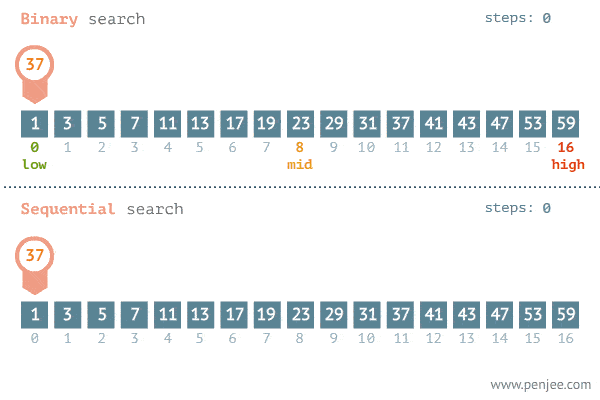

In [1]:
def sequential_search(arr, target):
    """
    Busca sequencial: percorre o array do início ao fim para encontrar o target.
    Retorna o índice do target se encontrado, ou -1 caso contrário.
    """
    for i, value in enumerate(arr):
        if value == target:
            return i
    return -1

def binary_search(arr, target):
    """
    Busca binária: busca eficiente em array ordenado.
    Retorna o índice do target se encontrado, ou -1 caso contrário.
    """
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

In [2]:
arr = [2, 5, 7, 10, 14, 18, 20]

print(sequential_search(arr, 10))
print(binary_search(arr, 10))

print(sequential_search(arr, 15))
print(binary_search(arr, 15))

3
3
-1
-1


Evaluate the searches with larger arrays, measuring execution time and number of steps (comparisons).

In [3]:
import numpy as np
import time
import random

def sequential_search(arr, target):
    steps = 0
    for i, value in enumerate(arr):
        steps += 1
        if value == target:
            return i, steps
    return -1, steps

def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    steps = 0
    while left <= right:
        steps += 1
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid, steps
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1, steps

np.random.seed(42)
max_value = 10**9

print(f"{'Size':>10} | {'Seq Steps':>10} | {'Seq Time (s)':>12} | {'Bin Steps':>10} | {'Bin Time (s)':>12}")
print("-" * 66)

sizes = [10**p for p in range(1, 9)]  # 10¹ to 10⁸

for size in sizes:
    arr_unsorted = np.random.randint(0, max_value, size=size)

    mid = int(size/2)

    target = arr_unsorted[-1]  # last element for worst case sequential


    # Sequential search
    start = time.time()
    idx, seq_steps = sequential_search(arr_unsorted, target)
    seq_time = time.time() - start

    # Binary search (includes sorting time)
    start = time.time()
    arr_sorted = np.sort(arr_unsorted,kind='quicksort')
    sort_time = time.time() - start

    start = time.time()
    _, bin_steps = binary_search(arr_sorted, target)
    search_time = time.time() - start

    bin_time_total = sort_time + search_time

    print(f"{size:10d} | {seq_steps:10d} | {seq_time:12.6f} | {bin_steps:10d} | {bin_time_total:12.6f}")

      Size |  Seq Steps | Seq Time (s) |  Bin Steps | Bin Time (s)
------------------------------------------------------------------
        10 |         10 |     0.000012 |          2 |     0.000349
       100 |        100 |     0.000014 |          4 |     0.000021
      1000 |       1000 |     0.000120 |         10 |     0.000032
     10000 |      10000 |     0.001320 |         13 |     0.000230
    100000 |     100000 |     0.020884 |         17 |     0.003876
   1000000 |    1000000 |     0.263374 |         18 |     0.039276
  10000000 |   10000000 |     3.480044 |         23 |     0.906934
 100000000 |   89075210 |    13.974109 |         22 |     3.186511


# Sorting Algorithms
  * Bubble Sort
  * Insertion Sort
  * Selection Sort
  * Performance Evaluation

IMAGES CREDITS: https://www.lavivienpost.net/

## Bubble Sort

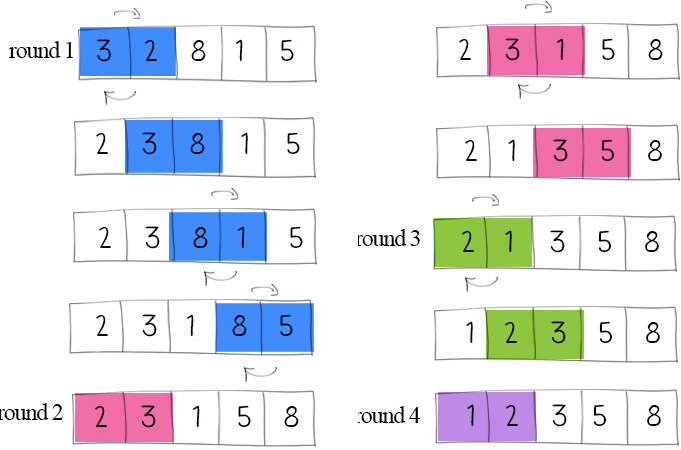

Repeatedly traverses the array, swapping adjacent elements to order the values in ascending or descending sequence until no more swaps are needed.

In [4]:
import numpy as np
import time

def bubble_sort(arr):
    n = len(arr)
    swap_count = 0
    shift_count = 0  # não usado
    step_count = 0
    for i in range(n):
        swapped = False
        for j in range(n - i - 1):
            step_count += 1
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swap_count += 1
                swapped = True
        if not swapped:
            break
    return swap_count, shift_count, step_count

## Selection Sort

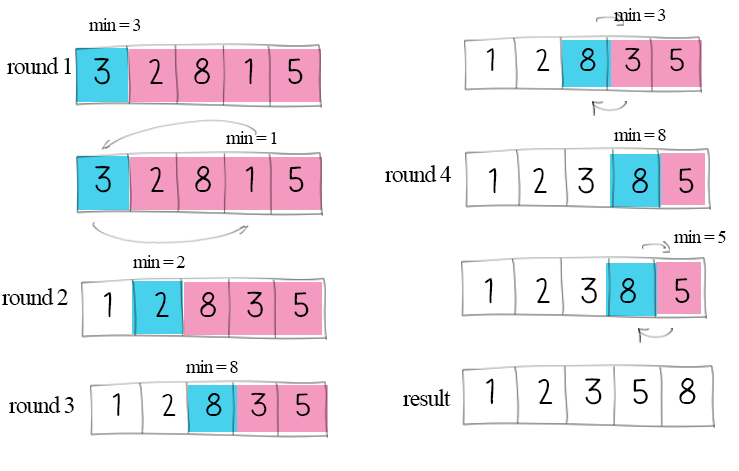

Iteratively traverses the array, selecting in each iteration the smallest (or largest, for descending order) element from the unsorted sublist and swapping it with the element at the starting position of that sublist, thereby progressively sorting the array until all elements are correctly positioned.

Now it is up to you !

In [5]:
def selection_sort(arr):
  n = len(arr)
  swap_count = 0
  shift_count = 0
  step_count = 0
  for i in range(n):
    min_idx = i
    for j in range(i + 1, n):
        step_count += 1
        if arr[j] < arr[min_idx]:
            min_idx = j
    if min_idx != i:
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
        swap_count += 1
  return swap_count, shift_count, step_count

## Insertion Sort

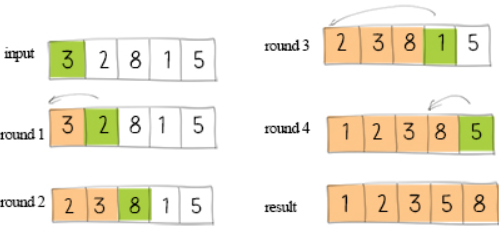


Iteratively traverses the array starting from the second element, comparing it with preceding elements and shifting them to the right until the correct position to insert the current element is found, thus ensuring the incremental (ascending or descending) sorting of the array until all elements are ordered.

Now it is up to you !

In [6]:
def insertion_sort(arr):
  n = len(arr)
  swap_count = 0
  shift_count = 0
  step_count = 0
  for i in range(1, n):
      key = arr[i]
      j = i - 1
      while j >= 0:
          step_count += 1
          if arr[j] > key:
              arr[j + 1] = arr[j]  # desloca
              shift_count += 1
              j -= 1
          else:
              break
      arr[j + 1] = key
  return swap_count, shift_count, step_count

## Evaluation of Sorting Algorithms
  * Metrics:
    * Execution Time
    * Number of Key Operations (e.g., swaps, shifts)

  * Test Setup:
    * Five distinct input sizes to analyze scalability and performance

In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt


sizes = [100, 200, 300, 400, 500]
algorithms = [
    ('Bubble Sort', bubble_sort),
    ('Insertion Sort', insertion_sort),
    ('Selection Sort', selection_sort)
]

results = {
    "times": {name: [] for name, _ in algorithms},
    "steps": {name: [] for name, _ in algorithms},
    "swaps": {name: [] for name, _ in algorithms},
    "shifts": {name: [] for name, _ in algorithms},
    "mem_moves": {name: [] for name, _ in algorithms}
}

base_arrays = {size: np.random.randint(0, 10000, size) for size in sizes}

for name, func in algorithms:
    print(f"\n{name}:")
    for size in sizes:
        arr_copy = base_arrays[size].copy()
        start = time.time()
        swap_count, shift_count, step_count = func(arr_copy)
        end = time.time()

        results["times"][name].append(end - start)
        results["steps"][name].append(step_count)
        results["swaps"][name].append(swap_count)
        results["shifts"][name].append(shift_count)

        #Shift == 1 memory move | Swap == 2 memory moves
        results["mem_moves"][name].append(swap_count * 2 + shift_count)

        print(
            f"Size {size:6d} | Swaps: {swap_count:6d} | Shifts: {shift_count:6d} "
            f"| Steps: {step_count:6d} | MemMoves: {swap_count * 2 + shift_count:3d} "
            f"| Time: {end - start:.4f} s "
            f"| {base_arrays[size][:5]} -> {arr_copy[:5]}"
        )


Bubble Sort:
Size    100 | Swaps:   2486 | Shifts:      0 | Steps:   4914 | MemMoves: 4972 | Time: 0.0026 s | [ 723 5508  925 9609 6751] -> [486 508 615 723 734]
Size    200 | Swaps:   9972 | Shifts:      0 | Steps:  19897 | MemMoves: 19944 | Time: 0.0139 s | [2353 6012 5974 5053 4335] -> [ 69 258 387 388 438]
Size    300 | Swaps:  20440 | Shifts:      0 | Steps:  44714 | MemMoves: 40880 | Time: 0.0220 s | [ 309  817 3347 4447 1022] -> [ 65 276 279 309 321]
Size    400 | Swaps:  39458 | Shifts:      0 | Steps:  79500 | MemMoves: 78916 | Time: 0.0427 s | [8117 1920 4702 5336 2919] -> [16 31 54 64 64]
Size    500 | Swaps:  59269 | Shifts:      0 | Steps: 124344 | MemMoves: 118538 | Time: 0.0662 s | [8433   58  597 2771 7882] -> [ 2 27 37 58 94]

Insertion Sort:
Size    100 | Swaps:      0 | Shifts:   2486 | Steps:   2584 | MemMoves: 2486 | Time: 0.0011 s | [ 723 5508  925 9609 6751] -> [486 508 615 723 734]
Size    200 | Swaps:      0 | Shifts:   9972 | Steps:  10166 | MemMoves: 9972 | 

## Comparative Visualization

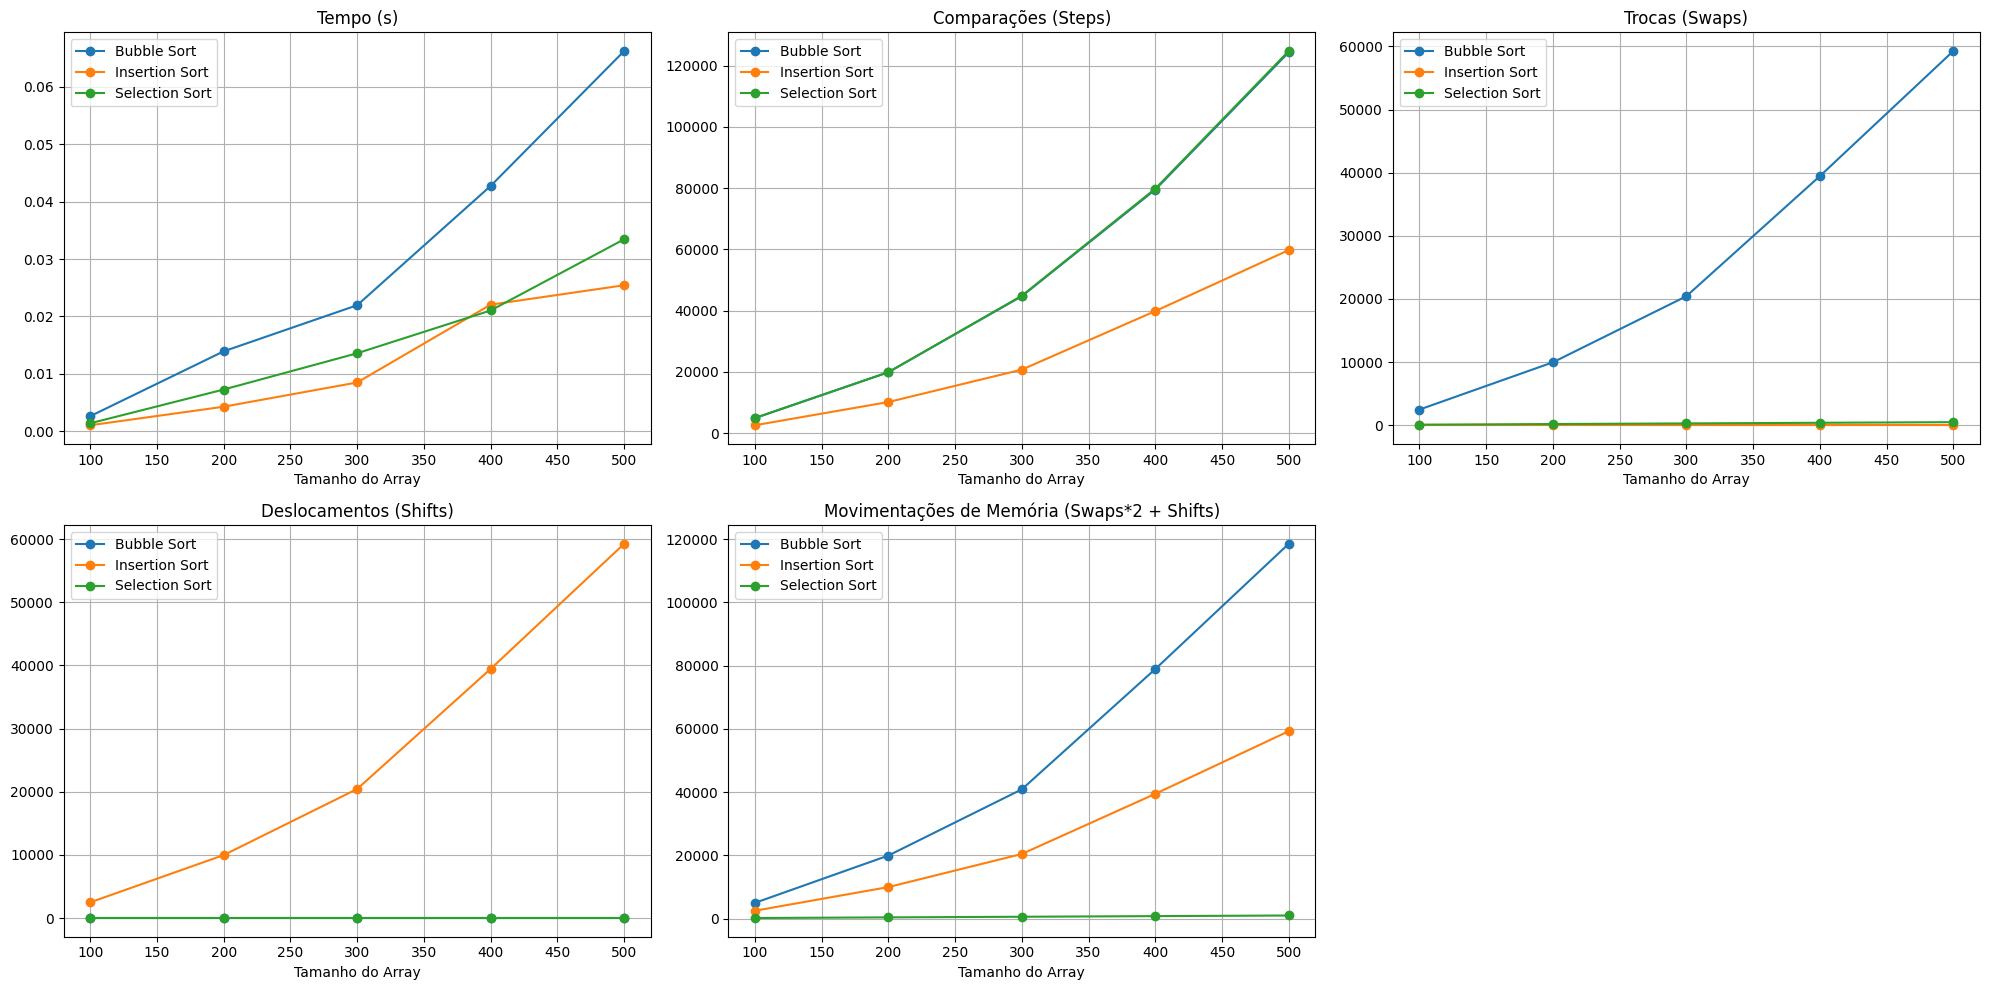

In [8]:
def plot_analysis(sizes, results, log_scale=False):
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))

    metricas = [
        ("Tempo (s)", results["times"]),
        ("Comparações (Steps)", results["steps"]),
        ("Trocas (Swaps)", results["swaps"]),
        ("Deslocamentos (Shifts)", results["shifts"]),
        ("Movimentações de Memória (Swaps*2 + Shifts)", results["mem_moves"])
    ]

    for idx, (titulo, dados) in enumerate(metricas):
        ax = axes[idx // 3, idx % 3]
        for name in dados:
            ax.plot(sizes, dados[name], marker='o', label=name)
        ax.set_title(titulo)
        ax.set_xlabel("Tamanho do Array")
        if log_scale:
            ax.set_yscale("log")
        ax.grid(True)
        ax.legend()

    axes[1, 2].axis("off")
    plt.tight_layout()
    plt.show()

plot_analysis(sizes, results)

# Recursion

Recursion is a computational method where a function solves a problem by calling itself with modified parameters, breaking the original problem into smaller subproblems of the same type, and combining their solutions. This process continues until a base case (termination condition) is reached, preventing infinite recursion.

Recursion is widely used in algorithms involving divide-and-conquer strategies, tree traversals, and mathematical computations such as factorial or Fibonacci sequences.

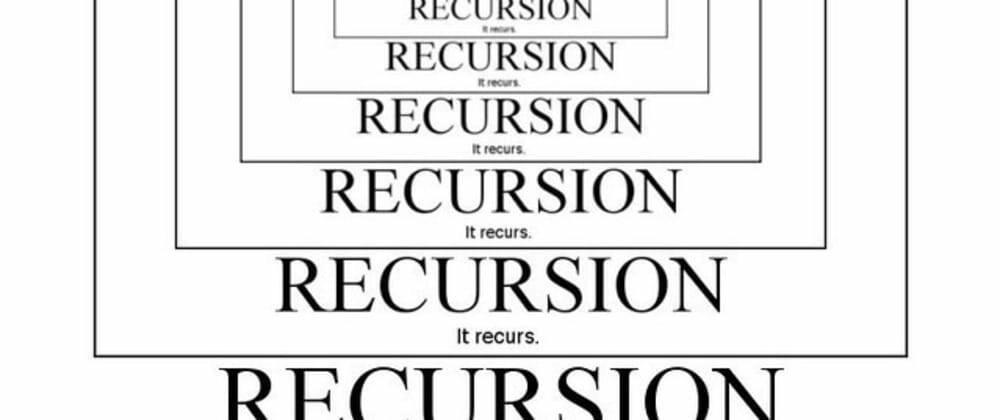

In [9]:
def recursive_print(i):
    if i <= 0: # stop criteria
        return

    print(i)

    recursive_print(i - 1)  # recursive call

    return

# Initial call
recursive_print(5)


5
4
3
2
1


E como imprimir na ordem inversa? Porque ? Explique

In [10]:
def recursive_print(i):
    if i <= 0:       # Stop Criteria
        return

    recursive_print(i - 1)  # recursive call

    print(i)

    return

# Initial call
recursive_print(5)

1
2
3
4
5


## Recursive Sum

In [11]:
def recursive_sum_number(n):
  if n <= 0:  # caso base
      return 0

  sum = n + recursive_sum_number(n - 1)
  return sum

def recursive_sum_array(arr):
  sum = 0
  if not arr:  # caso base: lista vazia
      return 0

  sum = arr[0] + recursive_sum_array(arr[1:])
  return sum

In [12]:
sum = recursive_sum_number(5)
print(sum)

sum = recursive_sum_array([1,2,3,4,5])
print(sum)

15
15


##Recursive Fibonacci

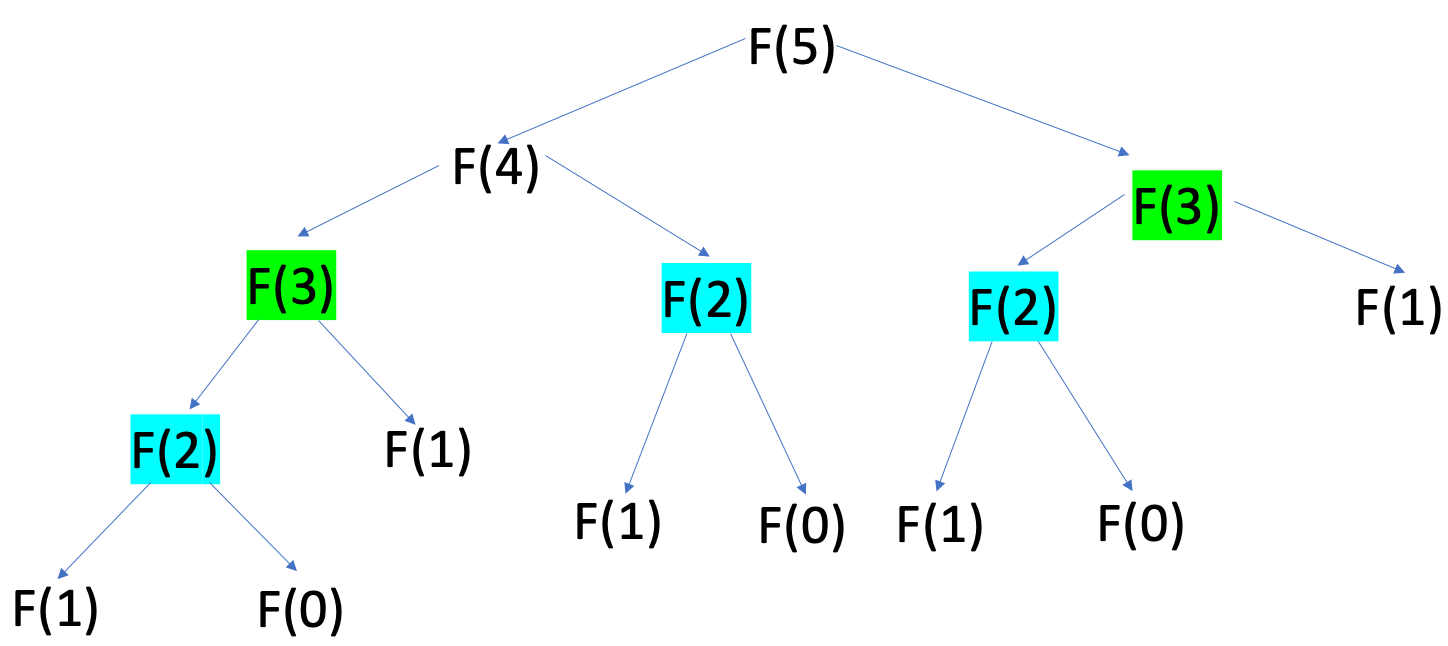

In [22]:
def recursive_fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return recursive_fibonacci(n - 1) + recursive_fibonacci(n - 2)

In [23]:
recursive_fibonacci(7)

13

## Quick Sort






Traverses the array recursively, selecting a pivot element at each iteration and rearranging the sublist so that all elements smaller than the pivot are on its left and all larger elements on its right, progressively ensuring that the entire array becomes correctly sorted.

In [15]:
def partition(arr, lo, hi):
    swap_count = 0
    step_count = 0

    mid = (lo + hi) // 2
    pivot = arr[mid]
    # Move o pivot para o final temporariamente
    arr[mid], arr[hi] = arr[hi], arr[mid]
    swap_count += 1

    i = lo
    for j in range(lo, hi):
        step_count += 1
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
            swap_count += 1

    arr[i], arr[hi] = arr[hi], arr[i]
    swap_count += 1
    return i, swap_count, step_count

def _quick_sort(arr, lo, hi):
    swap_count = 0
    step_count = 0

    if lo < hi:
        pivot_index, part_swaps, part_steps = partition(arr, lo, hi)
        swap_count += part_swaps
        step_count += part_steps

        _, left_swaps, left_steps = _quick_sort(arr, lo, pivot_index - 1)
        swap_count += left_swaps
        step_count += left_steps

        _, right_swaps, right_steps = _quick_sort(arr, pivot_index + 1, hi)
        swap_count += right_swaps
        step_count += right_steps

    return arr, swap_count, step_count

def quick_sort(arr):
  shift_count = 0
  _arr, swap_count, step_count = _quick_sort(arr,0, len(arr) - 1)
  return swap_count, shift_count,  step_count


In [24]:
arr = [5, 3, 8, 4, 2, 7, 1, 10]
sorted_arr, swaps, steps = _quick_sort(arr, 0, len(arr)-1)
print(sorted_arr)  # [1, 2, 3, 4, 5, 7, 8, 10]
print("Swaps:", swaps, "Steps:", steps)

[1, 2, 3, 4, 5, 7, 8, 10]
Swaps: 13 Steps: 13


#Add swap and shift counts

In [25]:
sizes = [100, 200, 300, 400, 500]
algorithms = [
    ('Bubble Sort', bubble_sort),
    ('Insertion Sort', insertion_sort),
    ('Selection Sort', selection_sort),
    ('Quick Sort', quick_sort)
]

results = {
    "times": {name: [] for name, _ in algorithms},
    "steps": {name: [] for name, _ in algorithms},
    "swaps": {name: [] for name, _ in algorithms},
    "shifts": {name: [] for name, _ in algorithms},
    "mem_moves": {name: [] for name, _ in algorithms}
}

base_arrays = {size: np.random.randint(0, 10000, size) for size in sizes}

for name, func in algorithms:
    print(f"\n{name}:")
    for size in sizes:
        arr_copy = base_arrays[size].copy()
        start = time.time()
        swap_count, shift_count, step_count = func(arr_copy)
        end = time.time()

        results["times"][name].append(end - start)
        results["steps"][name].append(step_count)
        results["swaps"][name].append(swap_count)
        results["shifts"][name].append(shift_count)

        #Shift == 1 memory move | Swap == 2 memory moves
        results["mem_moves"][name].append(swap_count * 2 + shift_count)

        print(
            f"Size {size:6d} | Swaps: {swap_count:6d} | Shifts: {shift_count:6d} "
            f"| Steps: {step_count:6d} | MemMoves: {swap_count * 2 + shift_count:3d} "
            f"| Time: {end - start:.4f} s "
            f"| {base_arrays[size][:5]} -> {arr_copy[:5]}"
        )


Bubble Sort:
Size    100 | Swaps:   2495 | Shifts:      0 | Steps:   4929 | MemMoves: 4990 | Time: 0.0029 s | [5417 1507 5630 3606  540] -> [117 315 362 419 540]
Size    200 | Swaps:   9859 | Shifts:      0 | Steps:  19795 | MemMoves: 19718 | Time: 0.0105 s | [6086 3106 8420 6353 6994] -> [ 36  81  86 109 110]
Size    300 | Swaps:  21768 | Shifts:      0 | Steps:  44597 | MemMoves: 43536 | Time: 0.0241 s | [8148 1617 1530 8095 9194] -> [17 18 40 45 68]
Size    400 | Swaps:  39793 | Shifts:      0 | Steps:  78939 | MemMoves: 79586 | Time: 0.0407 s | [7916 9076 5710 6191 4001] -> [ 55  62  63  78 134]
Size    500 | Swaps:  60993 | Shifts:      0 | Steps: 124344 | MemMoves: 121986 | Time: 0.0639 s | [6939 9483 9079 4351 6241] -> [ 11  23 113 147 154]

Insertion Sort:
Size    100 | Swaps:      0 | Shifts:   2495 | Steps:   2591 | MemMoves: 2495 | Time: 0.0011 s | [5417 1507 5630 3606  540] -> [117 315 362 419 540]
Size    200 | Swaps:      0 | Shifts:   9859 | Steps:  10054 | MemMoves: 98

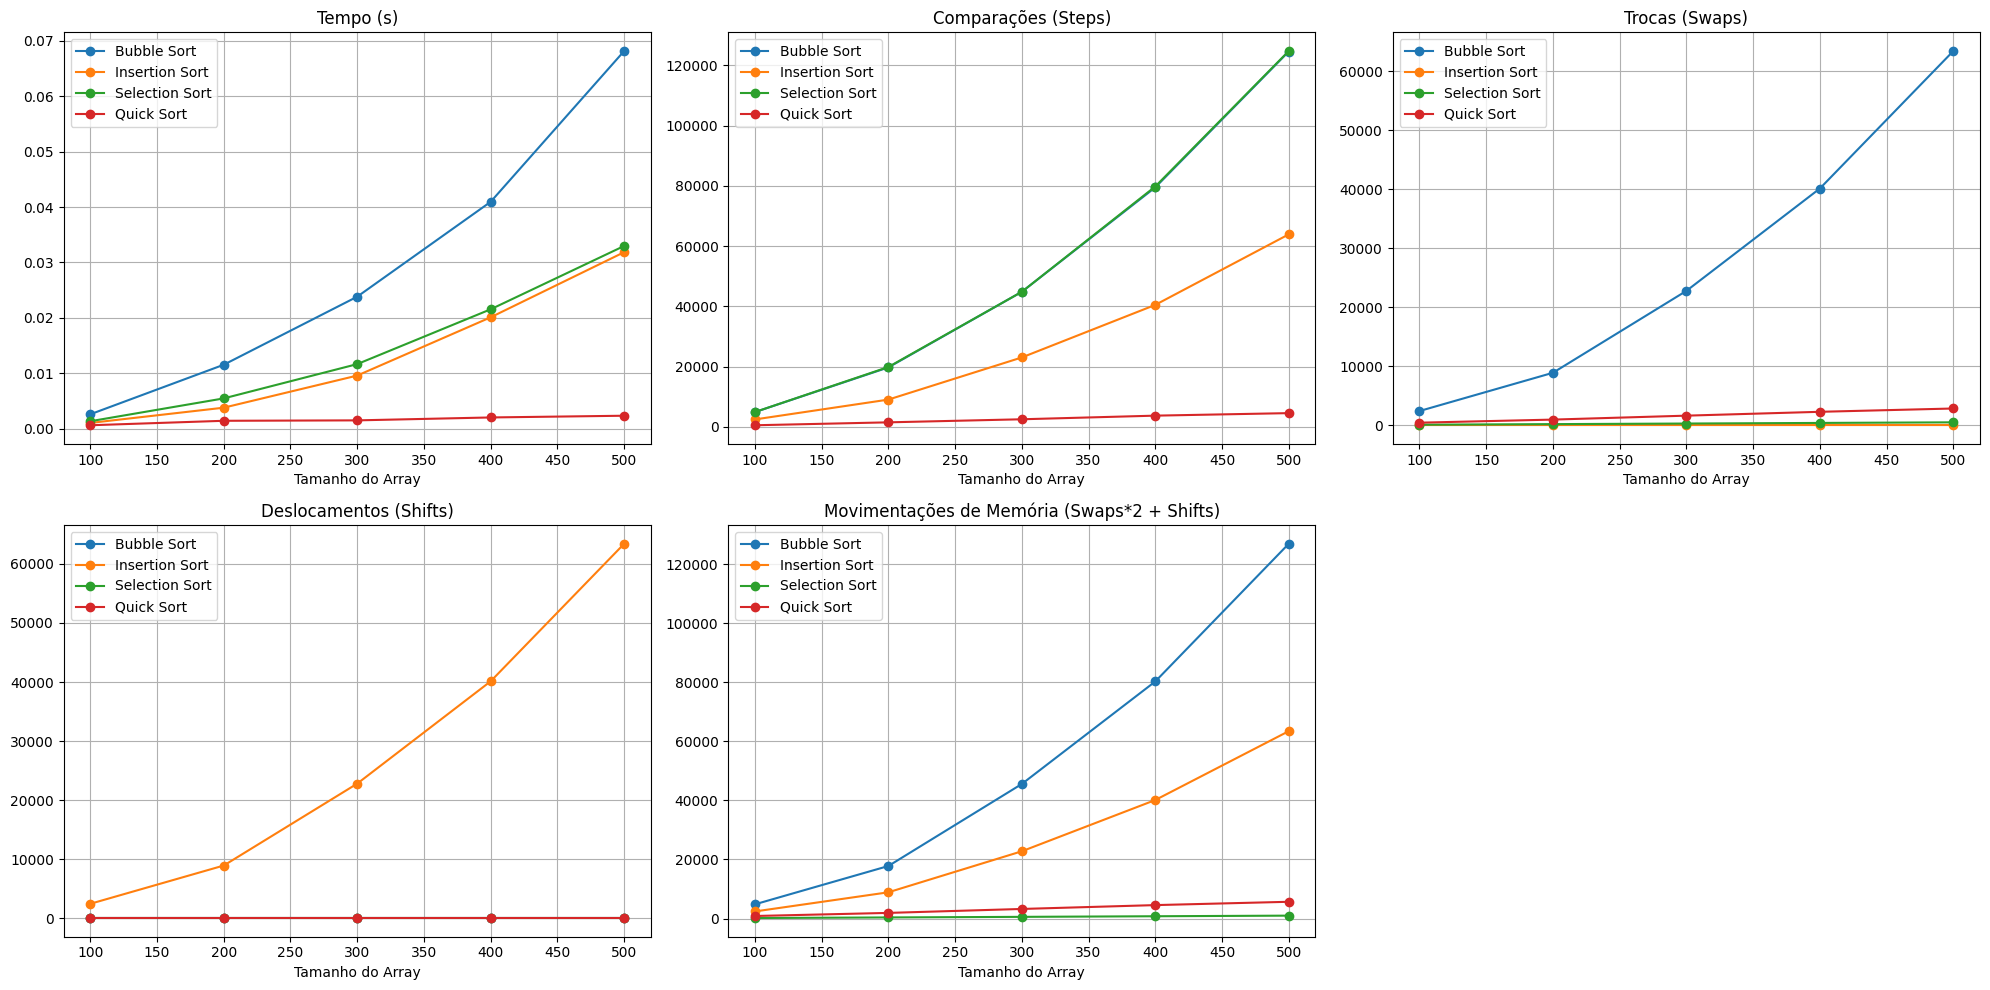

In [18]:
plot_analysis(sizes, results)